In [42]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib qt 
%matplotlib inline 
# %matplotlib widget
import math

In [ ]:
# Read grids
grid1 = np.genfromtxt("grid1")
grid2 = np.genfromtxt("grid2")
print(grid1.shape, grid2.shape)

In [ ]:
plt.figure()
plt.scatter(grid1[:, 0], grid1[:, 1], s=1)
plt.scatter(grid2[:, 0], grid2[:, 1], s=1)
# plt.xlim([0, 1])
# plt.ylim([0, 5])
plt.show()


Given N number of points, the first and the last we can find the ratio

In [ ]:
N = 10
x_init = 1
x_final = 10

r = (x_final/x_init) ** (1/(N - 1))
print(f"r = {r}")

x = np.zeros(N)
x[0] = x_init

for i in range(N-1):
    x[i+1] = x[i] * r  # x1[0][0][0][0][0][0][0][0][0][0][0][0][0][0][0][0][0][0][0][0][0][0][0][0][0][0][0] = x0 * r
    
plt.scatter(x, np.zeros(len(x)))
plt.show()

Debugging GRID from Code

In [ ]:
# Input variables
y_min = 0
change_y_pos = 9
y_max = 15

ngrid_uni = 50
ngridy1 = 80
ngridy2 = 50

# raty1 = 1.2
# raty2 = 1.2

# Basic calculations
dy_grid = 1/(ngrid_uni - 1)
ngridy = ngrid_uni + ngridy1 + ngridy2 - 1

# Allocations
y_grid = np.zeros(ngridy)
y_c = np.ones(ngridy) # variable for color control

#--- From y=ymin to y=1 (disk radius)
y_grid[1] = y_min
for j in range(1, ngrid_uni):
    y_grid[j+1] = y_grid[j] + dy_grid
    y_c[j+1] = 1
y_grid[0] = -y_grid[2]

#--- From y=1 to y=change_y_pos 
raty1 = (change_y_pos / 1) ** (1 / (ngridy1 - 1))
for j in range(ngridy1):
    y_grid[ngrid_uni + j+1] = y_grid[ngrid_uni + j] * raty1
    y_c[ngrid_uni + j+1] = 5


#--- From y=change_y_pos to y=ymax
raty2 = (y_max / change_y_pos) ** (1 / (ngridy2 + 1))
for j in range(ngridy2-1):
    y_grid[ngrid_uni + ngridy1 + j] = change_y_pos * raty2 ** (ngridy2-1 - j)
    y_c[ngrid_uni + ngridy1 + j] = 3
for j in range(ngridy2-1):
    y_grid[ngrid_uni + ngridy1 + j] = 2 * (y_max + change_y_pos)/2 - y_grid[ngrid_uni + ngridy1 + j]




print(f"y max found = {max(y_grid)}")

#--- Plotting Result
plt.scatter(np.linspace(0, len(y_grid), len(y_grid)), y_grid, c=y_c, cmap='viridis')
plt.xlabel("a/a")
plt.ylabel("y")
# plt.xlim([0, 2])
# plt.ylim([0, 2])
plt.grid()

for j in range(len(y_grid)):
    plt.plot([-20, 0], [y_grid[j], y_grid[j]], 'k-')
plt.show()



Method to flip a point along a specific line

In [ ]:
# Flip along y = ax + b
a = -4.714285714285714
b = 100

# point to flip
x0 = [5, 30]

delta_x = 2 * np.abs(a*x0[0] - x0[1] + b) * np.abs(a) / (a**2 + 1)
delta_y = 2 * np.abs(a*x0[0] - x0[1] + b) * 1 / (a**2 + 1)

x1 = [x0[0] + delta_x, x0[1] + delta_y]

# Force orthogonal axes
# plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, -b/a], [b, 0], 'k-')
plt.plot([x0[0], x1[0]], [x0[1], x1[1]], 'ro-')
plt.grid()
plt.show()

Trying to do the same to a progression

In [ ]:
def g_prog(start, end, n):
    # Calculate the common ratio
    r = (end / start) ** (1 / (n + 1))
    print(r)

    # Generate the geometric progression as a list
    progression = np.zeros(n + 2)
    for i in range(n + 2):
        progression[i] = start * r**i

    # Flip progression
    alfa = (end - start) / (n+1 - 0)
    beta = start - alfa * 0
    prog_new = np.copy(progression)
    x_new = np.zeros(len(progression))
    print(f"a = {alfa}, b = {beta}")
    for i in range(n+2):
        delta_x = 2 * np.abs(alfa * i - progression[i] + beta) * np.abs(alfa) / (alfa**2 + 1)
        delta_y = 2 * np.abs(alfa * i - progression[i] + beta) / (alfa**2 + 1)
        prog_new[i] += delta_y
        x_new[i] = i + delta_x
        # x_new[i] = i + delta_y*1.5


    return progression, prog_new, x_new

n = 20
prog, prog_new, x_new = g_prog(50, 1, n)
g_len = len(prog)


# Plotting Result
# Force orthogonal axes
# plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(np.linspace(0, g_len, g_len), prog, label="Old")
plt.scatter(x_new, prog_new, label="New")
plt.plot([0, n+1], [prog[0], prog[n+1]], 'ko-')
plt.xlabel("a/a")
plt.ylabel("y")
plt.legend()
# plt.xlim([-1, 1])
# plt.ylim([18, 26])
plt.grid()
plt.show()

Flipping along the horizontal with inverting the exponent 

In [ ]:
def g_prog(start, end, n):
    # Calculate the common ratio
    r = (end / start) ** (1 / (n + 1))
    print(r)

    # Generate the geometric progression as a list
    prog = np.zeros(n)
    for i in range(n):
        prog[i] = start * r**(n-1-i)

    prog_inv = 2 * (end+start)/2 - prog
    return prog, prog_inv

n = 20
start = 5
end = 80
prog, prog_inv = g_prog(start, end, n)
g_len = len(prog)
print(g_len)

# Plotting Result
plt.scatter(np.linspace(0, g_len, g_len), prog)
plt.scatter(np.linspace(0, g_len, g_len), prog_inv)
plt.plot(np.linspace(0, g_len, g_len), (end+start)/2 * np.ones(g_len), 'k--')
plt.xlabel("a/a")
plt.ylabel("y")
plt.grid()
plt.show()

Polynomial Curve for controllable denser grid

In [ ]:
# Polynomial from (x1, y1) to (x2, y2)
x1 = 1
y1 = 1
x2 = 10
y2 = 10

def f(x, s, r):
    a = -((2*(r - s)*(y1 - y2))/((-1 + s**2)*(x1 - x2)**2))
    b = (((-1 + 2*r - 2*s + s**2)*x1 + (1 + 2*r - 2*s - s**2)*x2)*(y1 - y2))/((-1 + s**2)*(x1 - x2)**2)
    c = ((-1 + s**2)*x2**2*y1 + (-1 + s**2)*x1**2*y2 + x1*x2*((-(-1 + 2*r - 2*s + s**2))*y1 + (1 + 2*r - 2*s - s**2)*y2))/((-1 + s**2)*(x1 - x2)**2)
    return a*x**2 + b*x + c


# Input variables ---------
s = 0
r = 0.5
N = 20
# -------------------------
# red point -> (x_ + s * Δx/2, y_ + r * Δy/2)


# Plotting Result

plt.plot([x1, x2], [y1, y2], 'k--')
x = np.linspace(x1, x2, N)
# blue line main
plt.plot(x, f(x, s, r), 'bo-')
# horizontal dotted
plt.plot([(x1+x2)/2, (x1+x2)/2 + s*(x2-x1)/2], [(y1+y2)/2, (y1+y2)/2], 'k:')
# vertical dotted
plt.plot([(x1+x2)/2 + s*(x2-x1)/2, (x1+x2)/2 + s*(x2-x1)/2], [(y1+y2)/2, (y1+y2)/2 + r*(y2 - y1)/2], 'k:')
# red dot
plt.scatter([(x1+x2)/2 + s*(x2-x1)/2], [(y1+y2)/2 + r*(y2 - y1)/2], c='r', s=100)
plt.grid()

# Resulting grid
for j in range(len(x)):
    plt.plot([-5, 0], [f(x[j], s, r), f(x[j], s, r)], 'k-')

# We want the derivative to be positive at the end
print(f"df/dx at end = {(f(x[-1],s,r) - f(x[-2],s,r))/(x[-1] - x[-2]):.4f}")
print(f"min delta_y found = {f(x[-1],s,r) - f(x[-2],s,r):.5f}")
plt.show()

Convergence

In [ ]:
errormax = np.genfromtxt("errormax")
print(errormax.shape)

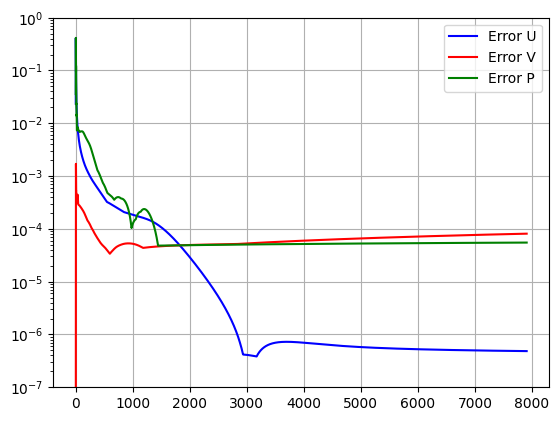

In [21]:
# Plotting
plt.figure()
plt.plot(errormax[:, 0], errormax[:, 1], 'b-', label = "Error U")
plt.plot(errormax[:, 0], errormax[:, 2], 'r-', label = "Error V")
plt.plot(errormax[:, 0], errormax[:, 3], 'g-', label = "Error P")
plt.grid()
plt.yscale("log")
plt.ylim([1e-7, 1e0])
plt.legend()
plt.show()

## Velocity Profiles

In [69]:
uvel = np.genfromtxt("Uvelocity")
vvel = np.genfromtxt("Vvelocity")

Velocity at center

In [82]:
# Velocity at center
# Calculate the Euclidean distance between each (x, y) pair and (0, 0)
distances_u = np.sqrt((uvel[:, 0] - 0)**2 + (uvel[:, 1] - 0)**2)
distances_v = np.sqrt((vvel[:, 0] - 0)**2 + (vvel[:, 1] - 0)**2)

# Find the index of the minimum distance
closest_index_x = np.argmin(distances_u)
closest_index_y = np.argmin(distances_v)


print(f"u({uvel[closest_index_x, 0]:.4f}, {uvel[closest_index_x, 1]:.4f})\t:\t{uvel[closest_index_x, 2]:.5f} [m/s]")
print(f"v({vvel[closest_index_y, 0]:.4f}, {vvel[closest_index_y, 1]:.4f})\t:\t{vvel[closest_index_y, 2]:.5f} [m/s]")


u(-0.2000, -0.0102)	:	1.13640 [m/s]
v(0.0000, 0.0000)	:	0.00000 [m/s]


U, V Scatter Plots

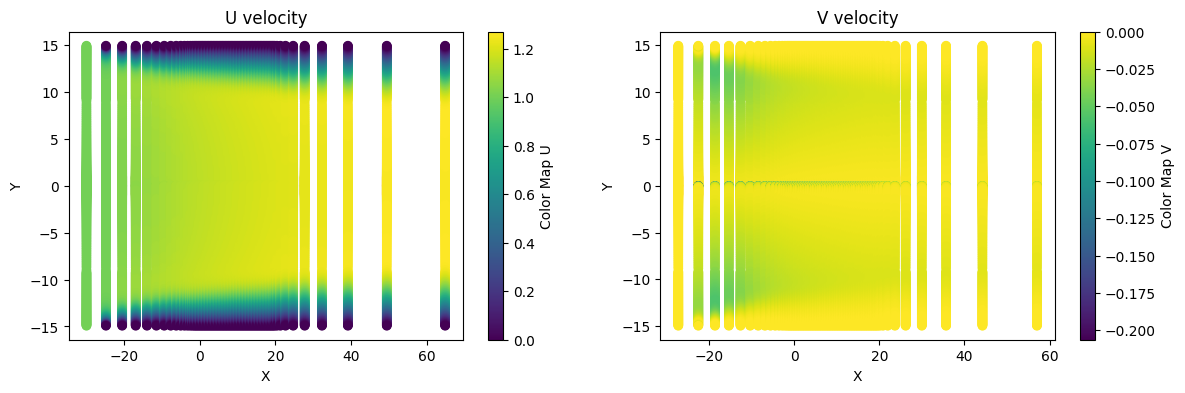

In [42]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Plot for U velocity
scatter_u = axs[0].scatter(uvel[:, 0], uvel[:, 1], c=uvel[:, 2], cmap='viridis')
axs[0].scatter(uvel[:, 0], -uvel[:, 1], c=uvel[:, 2], cmap='viridis')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('U velocity')
fig.colorbar(scatter_u, ax=axs[0], label='Color Map U')  # Add colorbar for U velocity

# Plot for V velocity
scatter_v = axs[1].scatter(vvel[:, 0], vvel[:, 1], c=vvel[:, 2], cmap='viridis')
axs[1].scatter(vvel[:, 0], -vvel[:, 1], c=vvel[:, 2], cmap='viridis')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('V velocity')
fig.colorbar(scatter_v, ax=axs[1], label='Color Map V')  # Add colorbar for V velocity

plt.show()


Importing into Pandas dataframe

In [2]:
import pandas as pd

# Read the file into a DataFrame
df = pd.read_csv("Uvelocity", names=["x", "y", "u"], delimiter=" ", skipinitialspace=True)

# Display the DataFrame
print(df)


               x          y         u
0     -29.814044  -0.010204  1.000000
1     -29.814044   0.010204  1.000000
2     -29.814044   0.030612  1.000000
3     -29.814044   0.051020  1.000000
4     -29.814044   0.071429  1.000000
...          ...        ...       ...
16704  64.732032  14.717763  0.067883
16705  64.732032  14.769722  0.050928
16706  64.732032  14.821391  0.033965
16707  64.732032  14.872771  0.016991
16708  64.732032  14.923863  0.000000

[16709 rows x 3 columns]


Plot for Fixed x

Using index 76 out of 76 unique x values


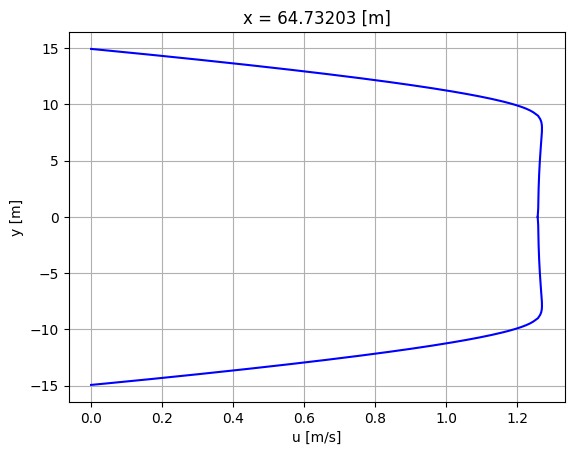

In [97]:
# Get the unique x values
unique_x = df['x'].unique()
x_index = 76

print(f"Using index {x_index} out of {len(unique_x)-1} unique x values")

# Plot the selected u and v values
plt.plot(df['u'][df['x']==unique_x[x_index]], df['y'][df['x']==unique_x[x_index]], 'b-')
plt.plot(df['u'][df['x']==unique_x[x_index]], -df['y'][df['x']==unique_x[x_index]], 'b-')
plt.xlabel('u [m/s]')
plt.ylabel('y [m]')
plt.title(f"x = {unique_x[x_index]:.5f} [m]")
plt.grid()
plt.show()

3d Plot

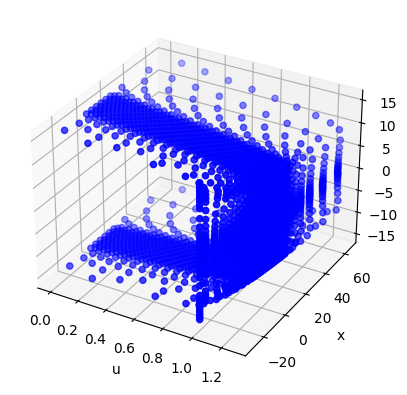

In [83]:

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
s = 10
ax.scatter(df['u'][::s], df['x'][::s], +df['y'][::s], color='b')
ax.scatter(df['u'][::s], df['x'][::s], -df['y'][::s], color='b')

# Set labels and grid
ax.set_xlabel('u')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.grid()

# Show the plot
plt.show()

